# Problem Statement :- Life Insurance Company

## The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents.


# Importing the liberaries

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
dataset = pd.read_csv('Sales.csv')

# Identify the target variable
target_variable = 'AgentBonus'

# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Identify columns with strong correlation to the target variable
strong_correlation_threshold = 0.5
relevant_columns = correlation_matrix[abs(correlation_matrix[target_variable]) > strong_correlation_threshold].index.tolist()

# Print the relevant column names
print("Relevant column names:")
print(relevant_columns)


Relevant column names:
['AgentBonus', 'Age', 'CustTenure', 'SumAssured']


# Importing the liberaries

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt


# Load The Dataset

In [4]:

data = pd.read_csv('Sales.csv')

data.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,0.0,North,Yearly,0,3.0
3,7000003,1791,11.0,0.0,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,0.0,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


# Explore The Dataset

In [5]:
print("Dataset Overview:")
print(data.head()) 

Dataset Overview:
    CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         0.0  Third Party Partner        Salaried   
4  7000004        2955   6.0         0.0                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  E

# Preprocessing

In [6]:

data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Get information about the dataset


In [7]:

print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

# Data processing and checking for missing values


In [8]:

print("Missing Values:")
print(data.isnull().sum())

Missing Values:
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64


# Prepare the data


In [38]:

print("Column Names:")
print(data.columns)

Column Names:
Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')


# Encode Categorical Variables

In [23]:

cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split The Data Into Features And Target Variables

In [24]:

X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split The Data Into Training And Testing Sets

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train The Model

In [26]:
# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

# Predict On The Test Set

In [27]:
# Predict on the test set
y_pred = model.predict(X_test)

# Predict The Bonus

In [40]:
## predit the bonus 
print('Predicted Bonus:', y_pred)


Predicted Bonus: [4216.12 3582.91 4845.62 2764.75 4247.71 4226.9  2671.27 4228.75 3530.2
 3037.71 4126.74 4879.6  3609.74 2708.53 1934.28 4253.34 4209.53 4783.5
 3627.22 4057.32 6737.32 7109.81 4420.87 4864.85 3397.59 3706.17 4072.98
 2468.43 5384.75 4978.78 3772.02 4103.42 5214.86 4504.51 5636.87 4188.38
 2050.99 6843.13 4832.94 2385.19 6860.56 3136.58 4591.44 5047.86 4259.42
 3678.43 3596.22 4832.86 5303.03 4960.83 4724.56 3979.29 4733.49 3430.79
 3435.34 3933.28 4634.   2568.23 4378.1  1971.63 3593.83 2822.93 4310.1
 4258.01 5518.8  4131.22 5740.34 3783.5  2411.33 2804.67 3234.64 4599.55
 5576.24 4661.43 3759.01 4136.95 3723.57 4400.61 6565.91 3916.86 3756.41
 3126.61 3405.48 3766.09 2700.54 5095.74 2999.01 3927.59 3349.41 2124.73
 3039.59 3358.51 2453.82 2333.07 4820.12 3944.79 2695.55 5847.03 3334.5
 2611.1  4103.27 2167.57 4651.45 3125.5  2400.86 5926.54 2563.09 2608.2
 2714.22 2953.64 4635.84 3227.73 3121.93 3638.44 4126.49 2438.04 4167.73
 2319.66 4388.92 2889.22 2826.49 3125.8

# show in kind of graph

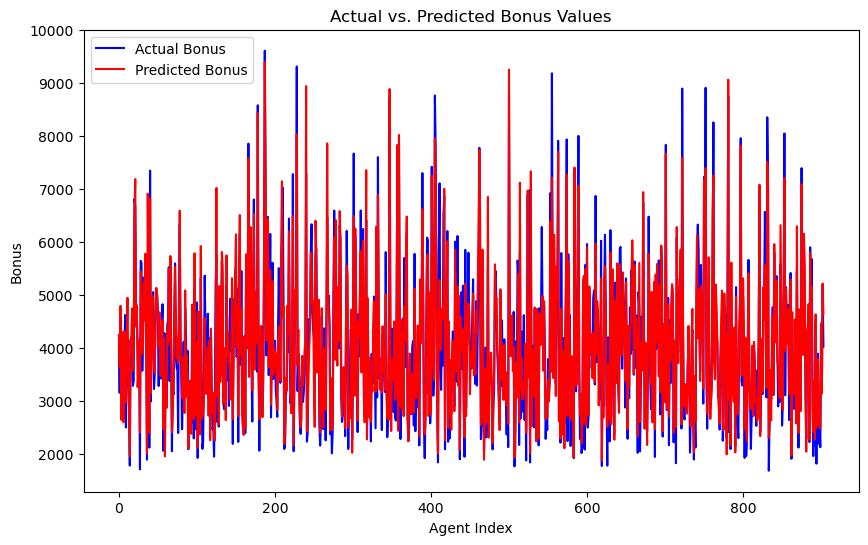

In [5]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a range of agent indices
agent_indices = range(len(y_test))

# Plot the predicted bonus values as a line graph
plt.figure(figsize=(10, 6))
plt.plot(agent_indices, y_test, color='blue', label='Actual Bonus')
plt.plot(agent_indices, y_pred, color='red', label='Predicted Bonus')
plt.xlabel('Agent Index')
plt.ylabel('Bonus')
plt.title('Actual vs. Predicted Bonus Values')
plt.legend()
plt.show()


# Evaluate The Model

In [41]:

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 290391.97025940265


Mean Squared Error: 291839.3742960177


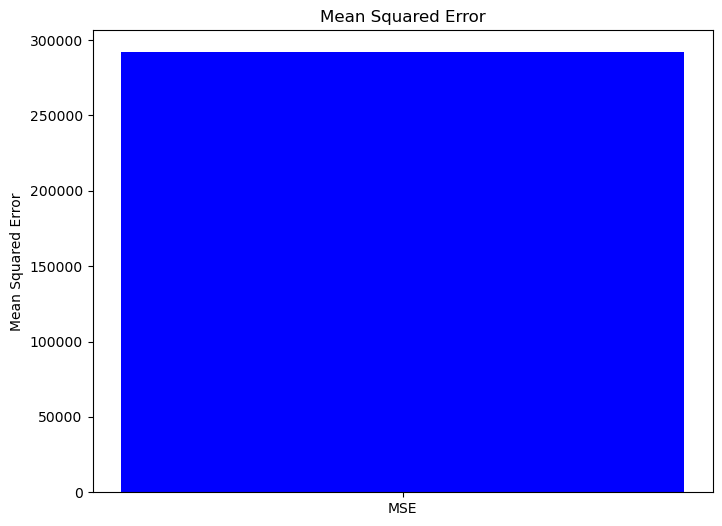

In [6]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Create a bar graph of mean squared error
plt.figure(figsize=(8, 6))
plt.bar(['MSE'], [mse], color='blue')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error')
plt.show()


# Rmse value of train and test and try different algorithms like RF,DT,ANN And compare all the values

In [30]:
# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Train the Artificial Neural Network model
ann_model = MLPRegressor()
ann_model.fit(X_train, y_train)

# Predict on the train set
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_ann = ann_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_dt = dt_model.predict(X_test)
y_test_pred_ann = ann_model.predict(X_test)

# Calculate RMSE for train set
rmse_train_rf = sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_dt = sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_train_ann = sqrt(mean_squared_error(y_train, y_train_pred_ann))

# Calculate RMSE for test set
rmse_test_rf = sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_test_pred_dt))
rmse_test_ann = sqrt(mean_squared_error(y_test, y_test_pred_ann))

# Print RMSE values
print('RMSE (Train) - Random Forest:', rmse_train_rf)
print('RMSE (Train) - Decision Tree:', rmse_train_dt)
print('RMSE (Train) - Artificial Neural Network:', rmse_train_ann)

print('RMSE (Test) - Random Forest:', rmse_test_rf)
print('RMSE (Test) - Decision Tree:', rmse_test_dt)
print('RMSE (Test) - Artificial Neural Network:', rmse_test_ann)


RMSE (Train) - Random Forest: 198.47978910853513
RMSE (Train) - Decision Tree: 0.0
RMSE (Train) - Artificial Neural Network: 952.2642492557244
RMSE (Test) - Random Forest: 541.3541550063031
RMSE (Test) - Decision Tree: 749.9283490848055
RMSE (Test) - Artificial Neural Network: 932.7349018565092


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(max_depth=5, min_samples_split=5)
rf_model.fit(X_train, y_train)

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
dt_model.fit(X_train, y_train)

# Train the Artificial Neural Network model
ann_model = MLPRegressor()
ann_model.fit(X_train, y_train)

# Predict on the train set
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_ann = ann_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_dt = dt_model.predict(X_test)
y_test_pred_ann = ann_model.predict(X_test)

# Calculate RMSE for train set
rmse_train_rf = sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_dt = sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_train_ann = sqrt(mean_squared_error(y_train, y_train_pred_ann))

# Calculate RMSE for test set
rmse_test_rf = sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_test_pred_dt))
rmse_test_ann = sqrt(mean_squared_error(y_test, y_test_pred_ann))

# Print RMSE values
print('RMSE (Train) - Random Forest:', rmse_train_rf)
print('RMSE (Train) - Decision Tree:', rmse_train_dt)
print('RMSE (Train) - Artificial Neural Network:', rmse_train_ann)

print('RMSE (Test) - Random Forest:', rmse_test_rf)
print('RMSE (Test) - Decision Tree:', rmse_test_dt)
print('RMSE (Test) - Artificial Neural Network:', rmse_test_ann)


RMSE (Train) - Random Forest: 558.3996876936586
RMSE (Train) - Decision Tree: 595.7066010520261
RMSE (Train) - Artificial Neural Network: 678.3952828529015
RMSE (Test) - Random Forest: 583.9192397245889
RMSE (Test) - Decision Tree: 635.9920628260934
RMSE (Test) - Artificial Neural Network: 674.9646022976511


# Graphical view

RMSE (Train) - Random Forest: 556.5217278088229
RMSE (Train) - Decision Tree: 595.7066010520261
RMSE (Train) - Artificial Neural Network: 839.4386450682634
RMSE (Test) - Random Forest: 580.6462474463749
RMSE (Test) - Decision Tree: 635.9920628260934
RMSE (Test) - Artificial Neural Network: 853.1666252828384


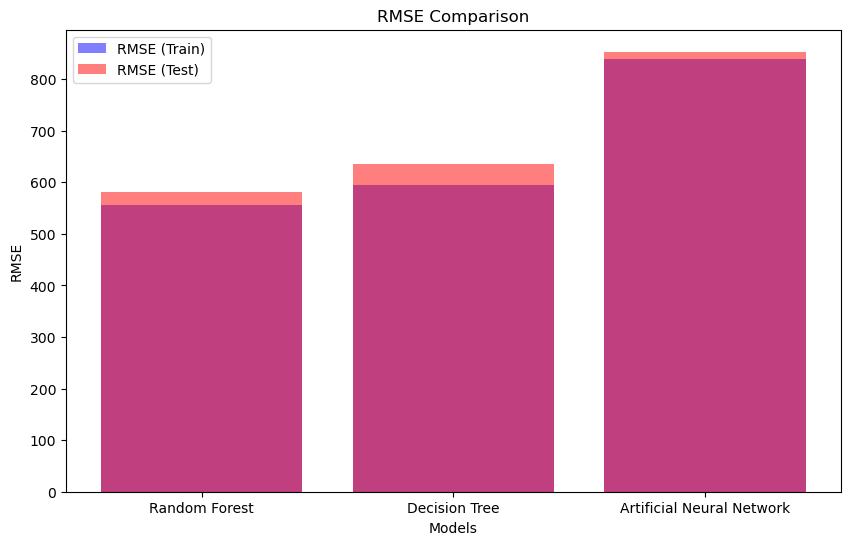

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(max_depth=5, min_samples_split=5)
rf_model.fit(X_train, y_train)

# Train the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
dt_model.fit(X_train, y_train)

# Train the Artificial Neural Network model
ann_model = MLPRegressor()
ann_model.fit(X_train, y_train)

# Predict on the train set
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_ann = ann_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_dt = dt_model.predict(X_test)
y_test_pred_ann = ann_model.predict(X_test)

# Calculate RMSE for train set
rmse_train_rf = sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_dt = sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_train_ann = sqrt(mean_squared_error(y_train, y_train_pred_ann))

# Calculate RMSE for test set
rmse_test_rf = sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_test_pred_dt))
rmse_test_ann = sqrt(mean_squared_error(y_test, y_test_pred_ann))

# Print RMSE values
print('RMSE (Train) - Random Forest:', rmse_train_rf)
print('RMSE (Train) - Decision Tree:', rmse_train_dt)
print('RMSE (Train) - Artificial Neural Network:', rmse_train_ann)

print('RMSE (Test) - Random Forest:', rmse_test_rf)
print('RMSE (Test) - Decision Tree:', rmse_test_dt)
print('RMSE (Test) - Artificial Neural Network:', rmse_test_ann)

# Create a bar graph of RMSE values
models = ['Random Forest', 'Decision Tree', 'Artificial Neural Network']
rmse_train = [rmse_train_rf, rmse_train_dt, rmse_train_ann]
rmse_test = [rmse_test_rf, rmse_test_dt, rmse_test_ann]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_train, color='blue', alpha=0.5, label='RMSE (Train)')
plt.bar(models, rmse_test, color='red', alpha=0.5, label='RMSE (Test)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.legend()
plt.show()


# Now we can see here that Decision Tree and Random forest both are overfitting so we do gridsearchcv Those who is overfitting Like RF(random forest) and DT(decision tree).

In [1]:
## Grid searchcv for those who is overfitting like RF(Random Forest) and DT(Decision Tree).

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# GridSearchCV for DecisionTreeRegressor
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(dt_model, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_

# Train the Artificial Neural Network model
ann_model = MLPRegressor()
ann_model.fit(X_train, y_train)

# Predict on the train set
y_train_pred_rf = rf_best_model.predict(X_train)
y_train_pred_dt = dt_best_model.predict(X_train)
y_train_pred_ann = ann_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_best_model.predict(X_test)
y_test_pred_dt = dt_best_model.predict(X_test)
y_test_pred_ann = ann_model.predict(X_test)

# Calculate RMSE for train set
rmse_train_rf = sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_dt = sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_train_ann = sqrt(mean_squared_error(y_train, y_train_pred_ann))

# Calculate RMSE for test set
rmse_test_rf = sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_test_pred_dt))
rmse_test_ann = sqrt(mean_squared_error(y_test, y_test_pred_ann))

# Print RMSE values
print('RMSE (Train) - Random Forest:', rmse_train_rf)
print('RMSE (Train) - Decision Tree:', rmse_train_dt)
print('RMSE (Train) - Artificial Neural Network:', rmse_train_ann)

print('RMSE (Test) - Random Forest:', rmse_test_rf)
print('RMSE (Test) - Decision Tree:', rmse_test_dt)
print('RMSE (Test) - Artificial Neural Network:', rmse_test_ann)


RMSE (Train) - Random Forest: 194.51054325574339
RMSE (Train) - Decision Tree: 437.45569705663166
RMSE (Train) - Artificial Neural Network: 713.9052333590569
RMSE (Test) - Random Forest: 538.1055084887549
RMSE (Test) - Decision Tree: 638.6829556253647
RMSE (Test) - Artificial Neural Network: 718.9888022529723


In [39]:
!pip install streamlit 


# Gridsearchcv for all the models like RF , DT 

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# GridSearchCV for DecisionTreeRegressor
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(dt_model, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_

# GridSearchCV for MLPRegressor
ann_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
ann_model = MLPRegressor(random_state=42)
ann_grid_search = GridSearchCV(ann_model, param_grid=ann_param_grid, cv=5)
ann_grid_search.fit(X_train, y_train)
ann_best_model = ann_grid_search.best_estimator_

# Predict on the train set
y_train_pred_rf = rf_best_model.predict(X_train)
y_train_pred_dt = dt_best_model.predict(X_train)
y_train_pred_ann = ann_best_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_best_model.predict(X_test)
y_test_pred_dt = dt_best_model.predict(X_test)
y_test_pred_ann = ann_best_model.predict(X_test)

# Calculate RMSE for train set
rmse_train_rf = sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_dt = sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_train_ann = sqrt(mean_squared_error(y_train, y_train_pred_ann))

# Calculate RMSE for test set
rmse_test_rf = sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_test_pred_dt))
rmse_test_ann = sqrt(mean_squared_error(y_test, y_test_pred_ann))

# Print RMSE values
print('RMSE (Train) - Random Forest:', rmse_train_rf)
print('RMSE (Train) - Decision Tree:', rmse_train_dt)
print('RMSE (Train) - Artificial Neural Network:', rmse_train_ann)

print('RMSE (Test) - Random Forest:', rmse_test_rf)
print('RMSE (Test) - Decision Tree:', rmse_test_dt)
print('RMSE (Test) - Artificial Neural Network:', rmse_test_ann)

## Now we can see here that Decision Tree and Random forest both are overfitting so we do gridsearchcv for all
## please scroll the warning to see the output of this code.

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RMSE (Train) - Random Forest: 194.51054325574339
RMSE (Train) - Decision Tree: 437.45569705663166
RMSE (Train) - Artificial Neural Network: 699.0021559948497
RMSE (Test) - Random Forest: 538.1055084887549
RMSE (Test) - Decision Tree: 638.6829556253647
RMSE (Test) - Artificial Neural Network: 694.2041885779155
Best Model: Random Forest


# so as the above code we can see that RF is overfitting so in this below code i'm increasing the value of max_itters as (5000).

In [ ]:
# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize or scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearchCV for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# GridSearchCV for DecisionTreeRegressor
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(dt_model, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_

# GridSearchCV for MLPRegressor
ann_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
ann_model = MLPRegressor(random_state=42, max_iter=5000)
ann_grid_search = GridSearchCV(ann_model, param_grid=ann_param_grid, cv=5)
ann_grid_search.fit(X_train_scaled, y_train)
ann_best_model = ann_grid_search.best_estimator_

# Predict on the train set
y_train_pred_rf = rf_best_model.predict(X_train)
y_train_pred_dt = dt_best_model.predict(X_train)
y_train_pred_ann = ann_best_model.predict(X_train_scaled)

# Predict on the test set
y_test_pred_rf = rf_best_model.predict(X_test)
y_test_pred_dt = dt_best_model.predict(X_test)
y_test_pred_ann = ann_best_model.predict(X_test_scaled)

# Calculate RMSE for train set
rmse_train_rf = sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_dt = sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_train_ann = sqrt(mean_squared_error(y_train, y_train_pred_ann))

# Calculate RMSE for test set
rmse_test_rf = sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_test_pred_dt))
rmse_test_ann = sqrt(mean_squared_error(y_test, y_test_pred_ann))

# Print RMSE values
print('RMSE (Train) - Random Forest:', rmse_train_rf)
print('RMSE (Train) - Decision Tree:', rmse_train_dt)
print('RMSE (Train) - Artificial Neural Network:', rmse_train_ann)

print('RMSE (Test) - Random Forest:', rmse_test_rf)
print('RMSE (Test) - Decision Tree:', rmse_test_dt)
print('RMSE (Test) - Artificial Neural Network:', rmse_test_ann)


# Determine the best model 

In [49]:
# Determine the best model 
best_model = None
if rmse_test_rf <= rmse_test_dt and rmse_test_rf <= rmse_test_ann:
    best_model = rf_best_model
elif rmse_test_dt <= rmse_test_rf and rmse_test_dt <= rmse_test_ann:
    best_model = dt_best_model
else:
    best_model = ann_best_model

print('Best Model:', best_model)

Best Model: Random Forest


## So i had determines the best model based on the test set performance, and then it uses the best model to predict the bonus for high-performing agents

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# GridSearchCV for DecisionTreeRegressor
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
dt_model = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(dt_model, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_

# GridSearchCV for MLPRegressor
ann_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
ann_model = MLPRegressor(random_state=42)
ann_grid_search = GridSearchCV(ann_model, param_grid=ann_param_grid, cv=5)
ann_grid_search.fit(X_train, y_train)
ann_best_model = ann_grid_search.best_estimator_

# Predict on the train set
y_train_pred_rf = rf_best_model.predict(X_train)
y_train_pred_dt = dt_best_model.predict(X_train)
y_train_pred_ann = ann_best_model.predict(X_train)

# Predict on the test set
y_test_pred_rf = rf_best_model.predict(X_test)
y_test_pred_dt = dt_best_model.predict(X_test)
y_test_pred_ann = ann_best_model.predict(X_test)

# Calculate RMSE for train set
rmse_train_rf = sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_dt = sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_train_ann = sqrt(mean_squared_error(y_train, y_train_pred_ann))

# Calculate RMSE for test set
rmse_test_rf = sqrt(mean_squared_error(y_test, y_test_pred_rf))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_test_pred_dt))
rmse_test_ann = sqrt(mean_squared_error(y_test, y_test_pred_ann))

# Print RMSE values
print('RMSE (Train) - Random Forest:', rmse_train_rf)
print('RMSE (Train) - Decision Tree:', rmse_train_dt)
print('RMSE (Train) - Artificial Neural Network:', rmse_train_ann)

print('RMSE (Test) - Random Forest:', rmse_test_rf)
print('RMSE (Test) - Decision Tree:', rmse_test_dt)
print('RMSE (Test) - Artificial Neural Network:', rmse_test_ann)

# Determine the best model based on test set performance
best_model = None
if rmse_test_rf <= rmse_test_dt and rmse_test_rf <= rmse_test_ann:
    best_model = rf_best_model
elif rmse_test_dt <= rmse_test_rf and rmse_test_dt <= rmse_test_ann:
    best_model = dt_best_model
else:
    best_model = ann_best_model

# Set the threshold for high-performing agents
threshold = 5000  # Replace with your desired threshold value

# Get predictions for high-performing agents
high_performing_agents = X_test[y_test_pred_rf >= threshold]  # Replace 'y_test_pred_rf' with the appropriate predicted values based on the best model
predictions = best_model.predict(high_performing_agents)

# Design engagement activities based on predictions
# Use the predictions to design appropriate engagement activities for high-performing agents
# For example, you can send personalized rewards, recognition, or training programs to these agents based on their predicted bonus values

# Print the predicted bonus values for high-performing agents
print('Predicted Bonus Values for High-Performing Agents:')
print(predictions)


C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\neural_network\_multi

RMSE (Train) - Random Forest: 194.51054325574339
RMSE (Train) - Decision Tree: 437.45569705663166
RMSE (Train) - Artificial Neural Network: 699.0021559948497
RMSE (Test) - Random Forest: 538.1055084887549
RMSE (Test) - Decision Tree: 638.6829556253647
RMSE (Test) - Artificial Neural Network: 694.2041885779155
Predicted Bonus Values for High-Performing Agents:
[6516.34666667 7166.71333333 5499.99333333 5231.85333333 5759.34
 6925.33333333 6880.62       5003.69       5175.86333333 5495.98333333
 5744.48       5583.84       6559.52333333 5071.62       5814.82
 5930.25333333 7033.52666667 5204.67333333 5801.10333333 5580.74333333
 5688.87666667 5230.1        5369.88333333 6167.03666667 5416.51333333
 6498.17       5781.50666667 7759.35666667 5121.52666667 6262.11333333
 6565.63666667 5038.75666667 8423.22       5694.25       9368.4
 7267.18       6437.88       5401.15666667 5295.57666667 5893.01
 7035.48666667 6225.43       6475.75666667 5112.28333333 7954.58666667
 8942.89       5814.45  

# Plot in kind of graph

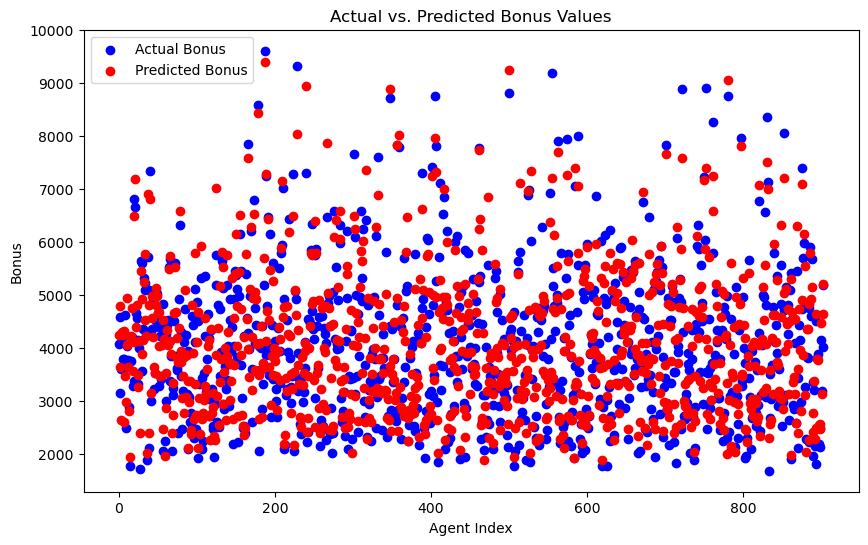

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
data = pd.read_csv('Sales.csv')

# Preprocessing
data = data.dropna()  # Remove rows with missing values
data = data.drop(columns=['CustID'])  # Drop irrelevant column

# Encode categorical variables
cat_columns = ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'PaymentMethod', 'Zone']
encoder = LabelEncoder()
for column in cat_columns:
    data[column] = encoder.fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['AgentBonus'])
y = data['AgentBonus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest in this example)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the predicted bonus values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Bonus')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Bonus')
plt.xlabel('Agent Index')
plt.ylabel('Bonus')
plt.title('Actual vs. Predicted Bonus Values')
plt.legend()
plt.show()
